<a href="https://colab.research.google.com/github/selfDotUsername/polynomial-interpolation/blob/main/Polynomial_Interpolation%3B_points_and_derivative_inpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0], [0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1], [0, 0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0], [0, 0, 0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1], [0, 0, 0, 0, 24.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0], [0, 0, 0, 0, 0, 120.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1], [0, 0, 0, 0, 0, 0, 720.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0], [0, 0, 0, 0, 0, 0, 0, 5040.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1], [0, 0, 0, 0, 0, 0, 0, 0, 40320.0, 0.0, 0.0, 0

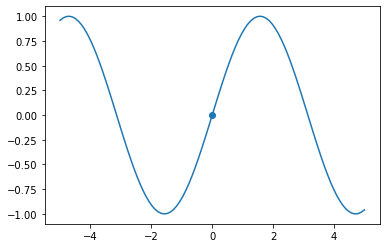

In [ ]:
###
from matplotlib import pyplot as plt
import numpy as np

e = 2.728

# e^x [1,1,1,1,1,1,1,1,1,1,1,1]
# sin(x) [0,1,0,-1,0,1,0,-1,0,1,0,-1]


showtype = 'range'

points = [[0,0,1,0,-1,0,1,0,-1,0,1,0,-1,0,1,0,-1,0,1,0,-1,0,1,0,-1]] ### no same x  

rangestart = -5
rangeend = 5

if showtype == 'points':
  x = np.linspace(points[0][0],points[-1][0],100)
elif showtype == 'range':
  x = np.linspace(rangestart,rangeend,100)



numberofpoints = len(points) #(degree of polynomial required to pass through points) +1 i.e amount of constants 
numberofderivatives = len(points[0])-1#-1 since on of them is the x value

def factorial(number):
  answer = 1
  for i in range(number):
    answer *= number-i
  if number == 0 :
    return 1
  else:
    return(answer)

c = [] #coefficients matrix
for j in range(numberofderivatives):
  for n in range(numberofpoints):
    c0 = [] #coefficients row
    for i in range(j):
      c0.append(0)  
    for i in range(j,numberofpoints*numberofderivatives):
      c0.append(points[n][0]**(i-j) * factorial(i)/factorial(i-j))
    c0.append(points[n][1+j])
    c.append(c0)


print(c) #matrix form a0 * x^0 + a1 * x^1 + ... + an * x ^n = y

###function to reduce rows

def pnr(r0,s,r1): # r0 plus n * r1
  r = []
  r.append(r0)
  r.append(r1)
  for i in range(len(r0)):
    r[0][i] += s * r[1][i]
  return(r[0])



###reduce bottom triangle
for n in range(len(c)):
  for i in range(len(c)-n-1):
    c[i+n+1] = pnr(c[i+n+1], -c[i+n+1][n]/c[n][n], c[n])


###reduce top triangle

print(c)
for n in range(len(c)):
  for i in range(len(c)-n-1):
    c[-i-2-n] = pnr(c[-i-2-n], -c[-i-2-n][-2-n]/c[-1-n][-2-n], c[-1-n])

###get all coefficients to 1
print(c)

for i in range(len(c)):
  if(not(c[i][i])==1):
    factor = c[i][i]
    for j in range(len(c[i])):
      c[i][j] *= 1/factor
     

print(c)
### put coefficients in list

pcs = [] # polynomial coefficients

for i in range(len(c)):
  pcs.append(c[i][-1])

print(pcs)

### plot polynomial and points
from matplotlib import pyplot as plt
import numpy as np

y = []

for i in range(len(x)):  
  y0 = 0
  for j in range(len(pcs)):
    y0 += x[i] ** j * pcs[j]
  y.append(y0)

y0 = 0
for j in range(len(pcs)):
  y0 += 5 ** j * pcs[j]
print(y0)


plt.plot(x,y)
for i in range(len(points)):
  plt.scatter(points[i][0],points[i][1])  
